In [212]:
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np

from pyworld3 import World3
from pyworld3.utils import plot_world_variables

params = {"lines.linewidth": "3"}
plt.rcParams.update(params)

# Standard run
Used as a benchmark for other runs

In [213]:
world_standard = World3(year_max=2100)
world_standard.set_world3_control()
world_standard.init_world3_constants()
world_standard.init_world3_variables()
world_standard.set_world3_table_functions()
world_standard.set_world3_delay_functions()
world_standard.run_world3(fast=False)

max_life_standard = np.max(world_standard.le)
min_life_standard = np.min(world_standard.le)

max_sopc_standard = np.max(world_standard.sopc)
min_sopc_standard = np.min(world_standard.sopc)

max_hsapc_standard = np.max(world_standard.hsapc)
min_hsapc_standard = np.min(world_standard.hsapc)

max_pop_standard = np.max(world_standard.pop)
min_pop_standard = np.min(world_standard.pop)

# Playing around with control functions
Below is sections where we play around with control functions, trying to understand the model nanually

In [214]:
def fioac_control(t, world, k):
    if t<1950:
        return 0.43
    else:
        return 0.5
    
def isopc_control(t, world, k):
    if True: #t < 1975:
        return 1.0
    else:
        return 1.3

def ifpc_control(t, world, k):
    if True: # t < 2000:
        return 1.0
    else:
        return 1.2
    


world3 = World3(year_max=2100)
world3.set_world3_control(fioac_control=fioac_control, isopc_control=isopc_control, ifpc_control=ifpc_control)
world3.init_world3_constants()
world3.init_world3_variables()
world3.set_world3_table_functions()
world3.set_world3_delay_functions()
world3.run_world3(fast=False)

## Plotting of what might be of interest

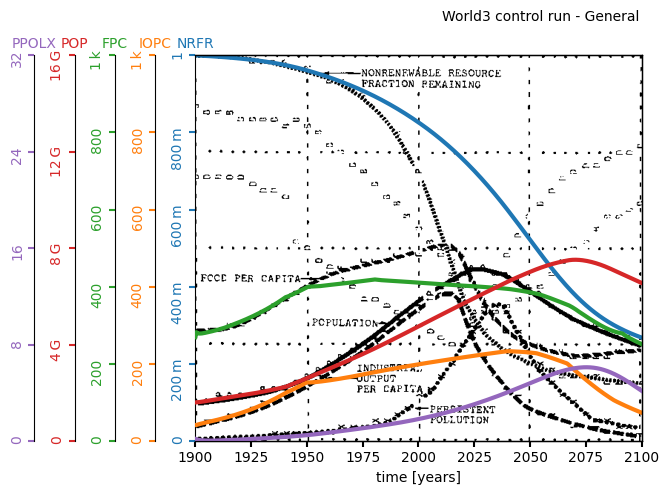

In [215]:
plot_world_variables(
    world3.time,
    [world3.nrfr, world3.iopc, world3.fpc, world3.pop, world3.ppolx],
    ["NRFR", "IOPC", "FPC", "POP", "PPOLX"],
    [[0, 1], [0, 1e3], [0, 1e3], [0, 16e9], [0, 32]],
    img_background="./img/fig7-7.png",
    figsize=(7, 5),
    title="World3 control run - General",
)
plt.show()


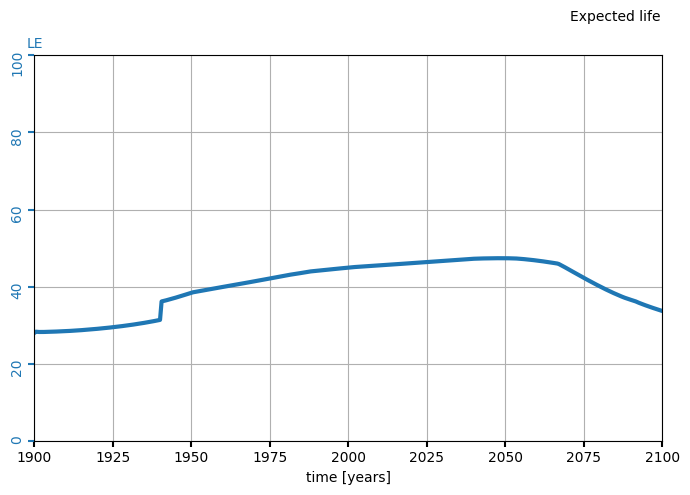

In [216]:
plot_world_variables(
    world3.time,
    [
        world3.le
    ],
    ["LE"],
    [[0, 1e2]],
    figsize=(7, 5),
    title="Expected life",
)
plt.grid()
plt.show()

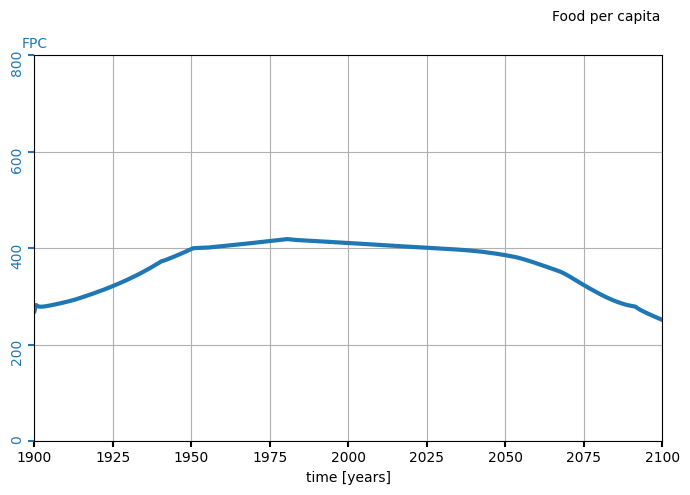

In [217]:
plot_world_variables(
    world3.time,
    [
        world3.fpc
    ],
    ["FPC"],
    [[0, 8e2]],
    figsize=(7, 5),
    title="Food per capita",
)
plt.grid()
plt.show()

### Normalized plot

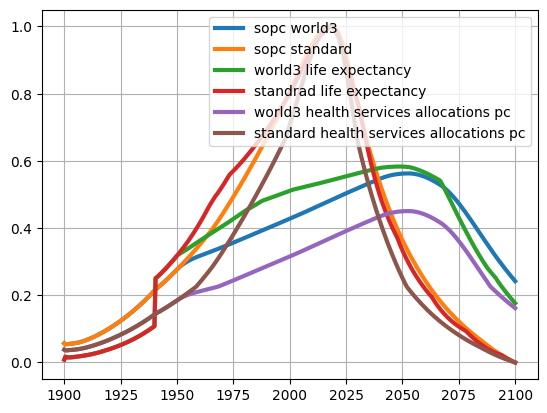

In [218]:
plt.plot(world3.time, (world3.sopc - min_sopc_standard) / (max_sopc_standard - min_sopc_standard), label="sopc world3")
plt.plot(world3.time, (world_standard.sopc - min_sopc_standard) / (max_sopc_standard - min_sopc_standard), label="sopc standard")

plt.plot(world3.time, (world3.le - min_life_standard) / (max_life_standard - min_life_standard), label="world3 life expectancy")
plt.plot(world3.time, (world_standard.le - min_life_standard) / (max_life_standard - min_life_standard), label="standrad life expectancy")

plt.plot(world3.time, (world3.hsapc - min_hsapc_standard) / (max_hsapc_standard - min_hsapc_standard), label="world3 health services allocations pc")
plt.plot(world3.time, (world_standard.hsapc - min_hsapc_standard) / (max_hsapc_standard - min_hsapc_standard), label="standard health services allocations pc")


plt.legend()
plt.grid()
plt.show()

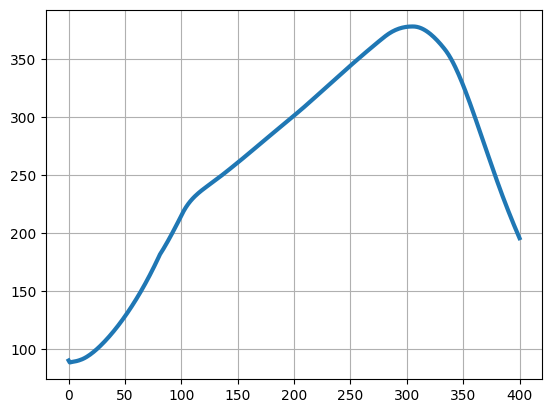

In [219]:
plt.plot(world3.sopc)
# sopc är en variabel

plt.grid()
plt.show()


# PID controller
This is an attempt att recreating the result of A1 last year using a PID controller

In [220]:
from functools import wraps

def PID_controller(Kp, Ki, Kd, dt, k, errors):
    """
    generell PID kontroll
    In:
        Kp: konstant för proportionella delen
        Ki: konstant för integral delen
        Kd: konstant för derivata delen
        dt: tidssteg storlek
        k: nuvarande iteration
        errors: lista av fel
    Ut:
        kontroll signal
    """
    # P controller
    P = Kp * errors[k] # fel från föregående körning
    # I controller
    integral = sum(errors[0:k]) * dt # integrerar alla felen från start till nu
    I = Ki * integral # max(min(integral, 6), -6) # kan med denna binda integral termen, ej nödvändigt
    # D controller
    D = Kd * (errors[k] - errors[k-1]) / dt
    return float(P + I + D)

def control_function(size):
    """Decorator for control function
    Adds the attributes errors and controls to control functions
    in:
        size: length of the arrays
    """
    # när funktionen kallas så anropas först wrappern
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            if not hasattr(wrapper, 'errors'):
                wrapper.errors = np.zeros((size,1))
            if not hasattr(wrapper, 'controls'):
                wrapper.controls = np.zeros((size,1))
            return func(*args, **kwargs)
        return wrapper
    return decorator

In [221]:
# kör om standard för att ändra max år
max_year = 2200
world_standard2 = World3(year_max=max_year)
world_standard2.set_world3_control()
world_standard2.init_world3_constants()
world_standard2.init_world3_variables()
world_standard2.set_world3_table_functions()
world_standard2.set_world3_delay_functions()
world_standard2.run_world3(fast=False)
max_life_standard2 = np.max(world_standard2.le)
min_life_standard2 = np.min(world_standard2.le)
max_sopc_standard2 = np.max(world_standard2.sopc)
min_sopc_standard2 = np.min(world_standard2.sopc)
max_hsapc_standard2 = np.max(world_standard2.hsapc)
min_hsapc_standard2 = np.min(world_standard2.hsapc)
max_pop_standard2 = np.max(world_standard2.pop)
min_pop_standard2 = np.min(world_standard2.pop)

In [ ]:
from numpy import arctan

world_PID = World3(year_max=max_year)
iterations = world_PID.n

@control_function(iterations)
def fioac_PID(t, world, k):
    # verkar som att de behöver va runt denna storleksordning för att fungera, dessa kan justeras för bättre resultat
    Kp = 9 * 1e-3
    Ki = 4 * 1e-4 # integral termen spökar lite
    Kd = 4 * 1e-3
    ref = 120 # 120 blev bäst för dem, detta är iallafall vilket värde vi försöker styra iopc mot
    error = (world.iopc[k] - ref) # större värde på fioac_control ger mindre värde på iopc. Därför måste felet stå i denna ordning
    fioac_PID.errors[k] = error
    if t<1972:
        fioac_PID.controls[k] = 0.43
        return 0.43
    else:
        PID_signal = PID_controller(Kp, Ki, Kd, world.dt, k, fioac_PID.errors)
        control_signal = np.arctan(PID_signal) / np.pi + 0.5 # tvingar den att vara mellan 0 och 1
        fioac_PID.controls[k] = control_signal
        return control_signal 

@control_function(iterations)
def isopc_PID(t, world, k):
    Kp = 9 * 1e-3
    Ki = 4 * 1e-4 
    Kd = 4 * 1e-3
    ref = 320 
    error = -(world.sopc[k] - ref) #observera minustecknet!!
    isopc_PID.errors[k] = error
    if t < 2130:
        isopc_PID.controls[k] = 1.0
        return 1.0
    else:
        PID_signal_1 = PID_controller(Kp, Ki, Kd, world.dt, k, isopc_PID.errors)
        control_signal_1 = np.arctan(PID_signal_1) / np.pi + 0.5
        isopc_PID.controls[k] = control_signal_1
        return control_signal_1

@control_function(iterations)
def ifpc_PID(t, world, k):
    Kp = 9 * 1e-3
    Ki = 4 * 1e-4 
    Kd = 4 * 1e-3
    ref = 280 
    error = (world.fpc[k] - ref) 
    ifpc_PID.errors[k] = error
    if t < 2120: #får bättre resultat om vi sätter till 2020
        ifpc_PID.controls[k] = 1.0
        return 1.0
    else:
        PID_signal_2 = PID_controller(Kp, Ki, Kd, world.dt, k, ifpc_PID.errors)
        control_signal_2 = np.arctan(PID_signal_2) / np.pi + 0.5
        isopc_PID.controls[k] = control_signal_2
        return control_signal_2

world_PID.set_world3_control(fioac_control=fioac_PID, isopc_control=isopc_PID, ifpc_control=ifpc_PID)
world_PID.init_world3_constants()
world_PID.init_world3_variables()
world_PID.set_world3_table_functions()
world_PID.set_world3_delay_functions()
world_PID.run_world3(fast=False)

C:\Users\Linnea\AppData\Local\Temp\ipykernel_31684\2317052164.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(P + I + D)


Lyckats rätt bra nu

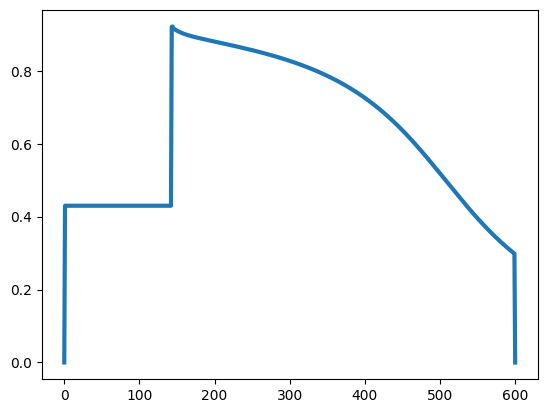

In [230]:
plt.plot(fioac_PID.controls)

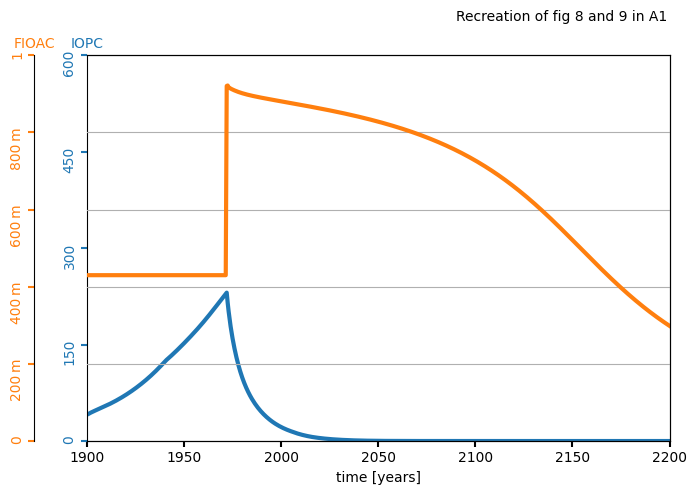

In [231]:
plot_world_variables(
    world_PID.time,
    [world_PID.iopc, world_PID.fioac],
    ["IOPC", "FIOAC"],
    [[0, 600], [0, 1]],
    figsize=(7, 5),
    title="Recreation of fig 8 and 9 in A1",
)
plt.grid()
plt.show()

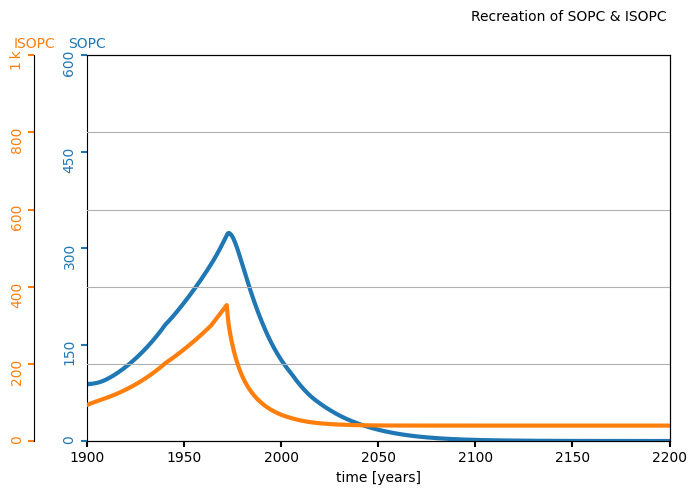

In [232]:
plot_world_variables(
    world_PID.time,
    [world_PID.sopc, world_PID.isopc],
    ["SOPC", "ISOPC"],
    [[0, 600], [0, 1000]],
    figsize=(7, 5),
    title="Recreation of SOPC & ISOPC",
)
plt.grid()
plt.show()

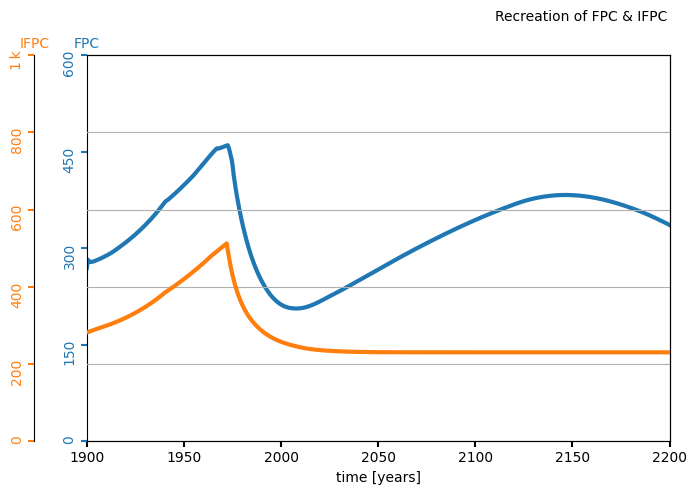

In [233]:
plot_world_variables(
    world_PID.time,
    [world_PID.fpc, world_PID.ifpc],
    ["FPC", "IFPC"],
    [[0, 600], [0, 1000]],
    figsize=(7, 5),
    title="Recreation of FPC & IFPC",
)
plt.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

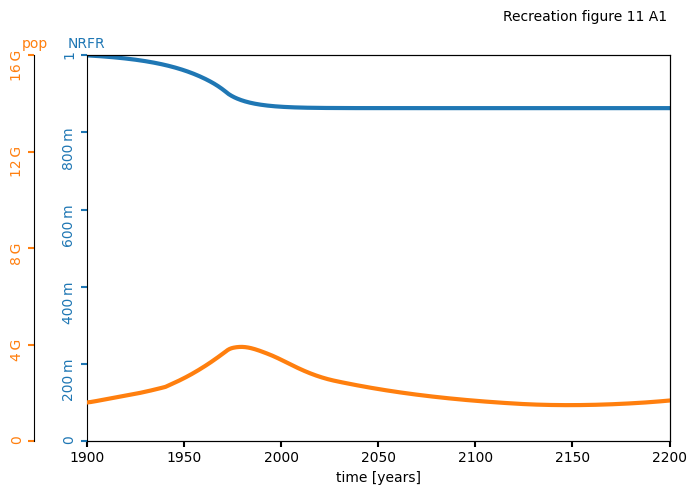

In [ ]:
#PLOTTA RESOURCES OCH POPULATION
# for figure 11: iopc have reference value 40, no control implemented for isopc & ifpc
plot_world_variables(
    world_PID.time,
    [world_PID.nrfr, world_PID.pop],
    ["NRFR", "pop"],
    [[0, 1], [0, 16e9]],
    figsize=(7, 5),
    title="Recreation figure 11 A1",
)
plt.show

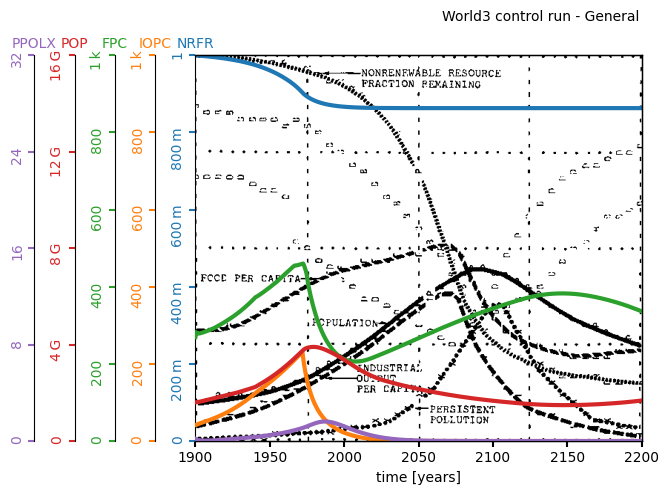

In [235]:
plot_world_variables(
    world_PID.time,
    [world_PID.nrfr, world_PID.iopc, world_PID.fpc, world_PID.pop, world_PID.ppolx],
    ["NRFR", "IOPC", "FPC", "POP", "PPOLX"],
    [[0, 1], [0, 1e3], [0, 1e3], [0, 16e9], [0, 32]],
    img_background="./img/fig7-7.png",
    figsize=(7, 5),
    title="World3 control run - General",
)
plt.show()

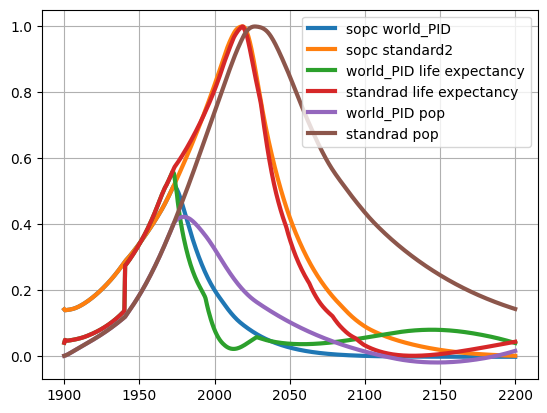

In [236]:
plt.plot(world_PID.time, (world_PID.sopc - min_sopc_standard2) / (max_sopc_standard2 - min_sopc_standard2), label="sopc world_PID")
plt.plot(world_PID.time, (world_standard2.sopc - min_sopc_standard2) / (max_sopc_standard2 - min_sopc_standard2), label="sopc standard2")

plt.plot(world_PID.time, (world_PID.le - min_life_standard2) / (max_life_standard2 - min_life_standard2), label="world_PID life expectancy")
plt.plot(world_PID.time, (world_standard2.le - min_life_standard2) / (max_life_standard2 - min_life_standard2), label="standrad life expectancy")

plt.plot(world_PID.time, (world_PID.pop - min_pop_standard2) / (max_pop_standard2 - min_pop_standard2), label="world_PID pop")
plt.plot(world_PID.time, (world_standard2.pop - min_pop_standard2) / (max_pop_standard2 - min_pop_standard2), label="standrad pop")



plt.legend()
plt.grid()
plt.show()